In [1]:
from itertools import product

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('nin_adjusted.csv').replace([np.inf, -np.inf], np.nan).dropna()
df = df.groupby(['hp.lr', 'hp.model_depth', 'hp.model_width', 'hp.dataset', 'hp.train_dataset_size'])['complexity.log_spec_orig_main_adjusted1'].mean()
df = df.groupby(['hp.lr', 'hp.model_depth', 'hp.model_width', 'hp.dataset']).apply(list)
print(df)
for i in range(len(df)):
    plt.plot(np.array(df[i]) - df[i][0], alpha=0.3)
plt.savefig('plots/test/datasize_vs_bound.png')
plt.close()


hp.lr  hp.model_depth  hp.model_width  hp.dataset
0.001  2               8               cifar10       [11.504000000000001, 11.367999999999999, 11.24...
                                       svhn                            [11.896, 11.786, 11.724, 11.71]
                       10              cifar10       [11.952000000000002, 11.746, 11.57400000000000...
                                       svhn          [12.290000000000001, 12.126, 12.046, 12.020000...
                       12              cifar10                        [12.306, 12.072, 11.896, 11.776]
                                                                           ...                        
0.010  6               12              svhn                 [33.435, 33.24, 32.855000000000004, 32.41]
                       14              cifar10                         [33.9825, 33.968, 33.8, 33.568]
                                       svhn          [34.376666666666665, 34.56, 33.474999999999994...
                       

In [13]:
df = pd.read_csv('nin_adjusted.csv').replace([np.inf, -np.inf], np.nan).dropna()
df = df.groupby(['hp.lr', 'hp.model_depth', 'hp.model_width', 'hp.dataset', 'hp.train_dataset_size'])['complexity.log_spec_orig_main_adjusted1'].mean()
df = df.groupby(['hp.lr', 'hp.model_depth', 'hp.model_width', 'hp.dataset']).apply(list)
qq = df.groupby(['hp.lr', 'hp.model_depth', 'hp.model_width', 'hp.dataset']).apply(lambda x: x[0][0] < x[0][-1])
df[qq==True]

hp.lr    hp.model_depth  hp.model_width  hp.dataset
0.00631  2               8               svhn               [11.766, 11.774000000000001, 11.852, 11.922]
                         10              svhn          [12.145999999999999, 12.122, 12.13600000000000...
                         12              svhn          [12.437999999999999, 12.41, 12.411999999999999...
0.01000  2               8               svhn                [11.804, 11.85, 11.936, 12.052000000000001]
                         10              svhn                            [12.15, 12.166, 12.232, 12.342]
                         12              svhn                 [12.46, 12.46, 12.482000000000001, 12.574]
                         14              svhn                 [12.722, 12.7, 12.706, 12.790000000000001]
                         16              svhn          [12.959999999999999, 12.884, 12.896, 12.969999...
         4               8               cifar10                         [20.378, 20.334, 20.36, 20.454]
   

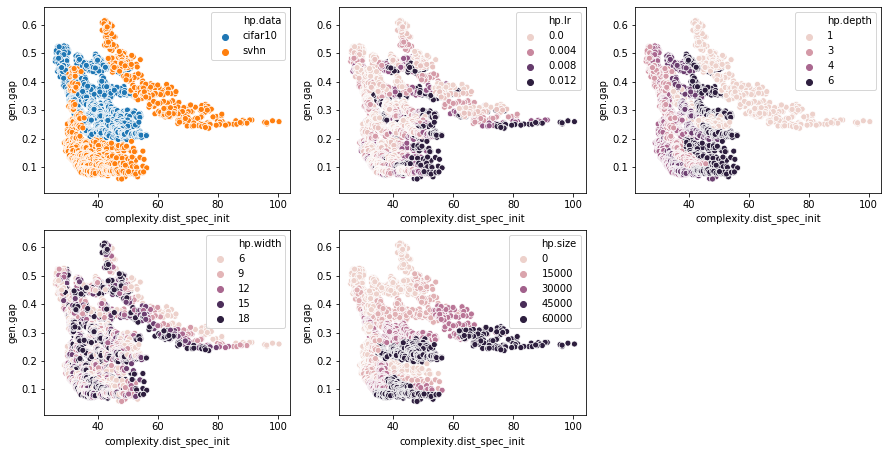

In [3]:
df = pd.read_csv('nin_adjusted.csv').replace([np.inf, -np.inf], np.nan).dropna()
df = df.rename(columns={'hp.model_depth': 'hp.depth', 'hp.model_width': 'hp.width', 'hp.train_dataset_size': 'hp.size', 'hp.dataset': 'hp.data', 'hp.lr': 'hp.lr',})
for measure in [x for x in df.columns if x.startswith('complexity.')]:
    plt.figure(figsize=(15,7.5))
    for idx, hue in enumerate([x for x in df.columns if x.startswith('hp.')]):
        plt.subplot(2,3,idx+1)
        sns.scatterplot(data=df, x=measure, y='gen.gap', hue=hue)
    #plt.savefig(f'plots/test/{measure}_vs_gap.png', bbox_inches='tight')
    #plt.close()
    break

In [23]:
df = pd.read_csv('nin_adjusted.csv').replace([np.inf, -np.inf], np.nan).dropna()
df = df.rename(columns={'hp.model_depth': 'hp.depth', 'hp.model_width': 'hp.width', 'hp.train_dataset_size': 'hp.size', 'hp.dataset': 'hp.data', 'hp.lr': 'hp.lr',})
for measure in [x for x in df.columns if x.startswith('complexity.')]:
    x = '\\begin{figure}[H]\\includegraphics[width=\\textwidth]{' + f'plots/test/{measure}_vs_gap.png' + '}\\caption{TODO}\\end{figure}'
    print(x)

\begin{figure}[H]\includegraphics[width=\textwidth]{plots/test/complexity.dist_spec_init_vs_gap.png}\caption{TODO}\end{figure}
\begin{figure}[H]\includegraphics[width=\textwidth]{plots/test/complexity.dist_spec_init_adjusted1_vs_gap.png}\caption{TODO}\end{figure}
\begin{figure}[H]\includegraphics[width=\textwidth]{plots/test/complexity.fro_dist_vs_gap.png}\caption{TODO}\end{figure}
\begin{figure}[H]\includegraphics[width=\textwidth]{plots/test/complexity.fro_dist_adjusted1_vs_gap.png}\caption{TODO}\end{figure}
\begin{figure}[H]\includegraphics[width=\textwidth]{plots/test/complexity.fro_over_spec_vs_gap.png}\caption{TODO}\end{figure}
\begin{figure}[H]\includegraphics[width=\textwidth]{plots/test/complexity.fro_over_spec_adjusted1_vs_gap.png}\caption{TODO}\end{figure}
\begin{figure}[H]\includegraphics[width=\textwidth]{plots/test/complexity.inverse_margin_vs_gap.png}\caption{TODO}\end{figure}
\begin{figure}[H]\includegraphics[width=\textwidth]{plots/test/complexity.inverse_margin_adjust

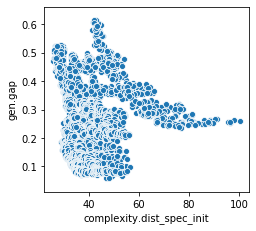

In [5]:
df = pd.read_csv('nin_adjusted.csv').replace([np.inf, -np.inf], np.nan).dropna()
df = df.rename(columns={'hp.model_depth': 'hp.depth', 'hp.model_width': 'hp.width', 'hp.train_dataset_size': 'hp.size', 'hp.dataset': 'hp.data', 'hp.lr': 'hp.lr',})
for measure in [x for x in df.columns if x.startswith('complexity.')]:
    plt.figure(figsize=(12.5,7.5))
    plt.subplot(2,3,idx+1)
    sns.scatterplot(data=df, x=measure, y='gen.gap')
    #plt.savefig(f'plots/test/{measure}_vs_gap.png', bbox_inches='tight')
    #plt.close()
    break

In [70]:
asdf = df.groupby(['hp.lr', 'hp.depth', 'hp.width', 'hp.data', 'hp.size'])[['gen.gap', 'complexity.log_spec_orig_main_adjusted1']].mean()
size_envs = asdf.groupby(['hp.lr', 'hp.depth', 'hp.width', 'hp.data']).apply(lambda x: list(zip(x['complexity.log_spec_orig_main_adjusted1'], x['gen.gap'])))
size_envs.iloc[0]

[(11.504000000000001, 0.43452),
 (11.367999999999999, 0.3764),
 (11.244000000000002, 0.32165999999999995),
 (11.172, 0.27492)]

In [74]:
index = size_envs.iloc[1]
pairs = [x for x in product(index, index) if (x[0][1] < x[1][1]) and (x[0][0] < x[1][0])]
pairs

[((11.786, 0.48324), (11.896, 0.5823799999999999)),
 ((11.724, 0.38232), (11.896, 0.5823799999999999)),
 ((11.724, 0.38232), (11.786, 0.48324)),
 ((11.71, 0.31532), (11.896, 0.5823799999999999)),
 ((11.71, 0.31532), (11.786, 0.48324)),
 ((11.71, 0.31532), (11.724, 0.38232))]

In [53]:
df = pd.read_csv('nin_adjusted.csv').replace([np.inf, -np.inf], np.nan).dropna()
df = df.rename(columns={'hp.model_depth': 'hp.depth', 'hp.model_width': 'hp.width', 'hp.train_dataset_size': 'hp.size', 'hp.dataset': 'hp.data', 'hp.lr': 'hp.lr',})
measures = [x for x in df.columns if x.startswith('complexity.')]
hparams = ['hp.lr', 'hp.depth', 'hp.width', 'hp.data', 'hp.size']

sns.set_style('white')
for measure in measures:
    asdf = df.groupby(hparams)[['gen.gap', measure]].mean()
    plt.figure(figsize=(25,25))
    for col_idx, hparam in enumerate(hparams):
        plt.subplot(6,5,1+col_idx)
        plt.title(hparam)
        sns.scatterplot(data=df, x=measure, y='gen.gap', hue=hparam, s=10, edgecolor='none', alpha=0.25)
        plt.xlabel('')
        size_envs = asdf.reset_index(level=[hparam]).groupby([x for x in hparams if x != hparam]).apply(lambda x: list(zip(x[measure], x['gen.gap'], x[hparam])))
        for row_idx, hparam_val in enumerate(sorted(df[hparam].unique())):
            plt.subplot(6,5,(5*row_idx)+6+col_idx)
            sns.scatterplot(data=df, x=measure, y='gen.gap', color='b', s=5, edgecolor='none', alpha=0.025)
            total_red = 0
            for i in range(len(size_envs)):
                index = size_envs.iloc[i]
                pairs = [(x[0][0:2], x[1][0:2]) for x in product(index, index) if (x[0][1] < x[1][1]) and (x[0][0] > x[1][0]) and (x[0][2]==hparam_val or x[1][2]==hparam_val)]
                total_red += len(pairs)
                for pair in pairs:
                    plt.plot(*list(zip(*pair)), alpha=0.3, color='r')
            plt.title(f'{hparam_val} ({total_red} negatives)')
            plt.xlabel('')
        plt.xlabel(measure)
    plt.savefig(f'plots/measure_vs_gap_signs/{measure}_split_hparams.png', bbox_inches='tight')
    plt.close()

In [55]:
[x[11:] for x in df.columns if x.startswith('complexity')]

['dist_spec_init',
 'dist_spec_init_adjusted1',
 'fro_dist',
 'fro_dist_adjusted1',
 'fro_over_spec',
 'fro_over_spec_adjusted1',
 'inverse_margin',
 'inverse_margin_adjusted1',
 'l2',
 'l2_adjusted1',
 'l2_dist',
 'l2_dist_adjusted1',
 'log_prod_of_fro',
 'log_prod_of_fro_adjusted1',
 'log_prod_of_fro_over_margin',
 'log_prod_of_fro_over_margin_adjusted1',
 'log_prod_of_spec',
 'log_prod_of_spec_adjusted1',
 'log_prod_of_spec_over_margin',
 'log_prod_of_spec_over_margin_adjusted1',
 'log_spec_orig_main',
 'log_spec_orig_main_adjusted1',
 'log_sum_of_fro',
 'log_sum_of_fro_adjusted1',
 'log_sum_of_fro_over_margin',
 'log_sum_of_fro_over_margin_adjusted1',
 'log_sum_of_spec',
 'log_sum_of_spec_adjusted1',
 'log_sum_of_spec_over_margin',
 'log_sum_of_spec_over_margin_adjusted1',
 'pacbayes_flatness',
 'pacbayes_flatness_adjusted1',
 'pacbayes_init',
 'pacbayes_init_adjusted1',
 'pacbayes_mag_flatness',
 'pacbayes_mag_flatness_adjusted1',
 'pacbayes_mag_init',
 'pacbayes_mag_init_adjusted